# Anzahl und Art der Schulwegübergange in der Stadt Zürich 
Datum: 22.07.2021

Im Rahmen der Zahl der Woche suchen wir für den «Schulbeginn» Ende August die aktuelle Anzahl der Schulwegübergänge (nach Kategorien) in der Stadt Zürich.
Dazu wollen wir die frei verfügbaren Geodaten «[Schulwegübergänge](https://www.stadt-zuerich.ch/geodaten/download/Schulweguebergaenge)» auf dem Geoportal der Stadt Zürich verwenden.

Die [Metadaten dazu](https://www.geocat.ch/geonetwork/srv/ger/md.viewer#/full_view/8d325d82-81a9-46a9-9270-644b68318ef8) sind auf GeoCat ersichtlich


Mit Colab kann **dieses Jupyter-Notebook interaktiv im Browser** gestartet werden:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DonGoginho/myPy/blob/main/schulweguebergaenge/.ipynb_checkpoints/zdw_schulweguebergaenge-checkpoint.ipynb)


#### Z.K. Interessantes Wissen zu Schulwegkarte der Stadt Zürich, Gemeinderat Sept. 2021

Viele interessante Fakten sind zu finden in der [Beantwortung zur schriftlichen Anfrage](https://www.gemeinderat-zuerich.ch/Geschaefte/detailansicht-geschaeft/Dokument/7b44f975-ddaf-417a-9f68-92d9c51e8b96/2021_%200291.pdf) von Olivia Romanelli und Natalie Eberle betreffend **Aktualisierung der Schulwegkarte, Kadenz der Aktualisierungen, Art und
Umfang der erhobenen Schulwegdaten, Bedeutung der Karte für die Planung von Strassenprojekten sowie generelle Haltung zur Sicherung des
Strassenraums für Kinder auf den unmittelbaren Schulwegen und für andere zu Fuss gehende Minderheiten**.


## Importiere notwendige Packages:

In [2]:
%pip install geopandas fiona requests folium mplleaflet contextily

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import folium
import mplleaflet
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

pd.options.display.float_format = '{:.0f}'.format
#pd.set_option('display.width', 100)
#pd.set_option('display.max_columns', 15)

## Lies die Daten ein


Die Geodaten können manuell als [csv, Shapefile, Geopackage oder GeoJSON-Datei heruntergeladen](https://www.stadt-zuerich.ch/geodaten/download/Schulweguebergaenge) werden oder per [WFS-GeoJSON-Service](https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Schulweguebergaenge?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=poi_schulweg_view) (Layer `poi_schulweg-view`) direkt abgefragt werden.

Wir schauen uns hier mal letztere Möglichkeit mit dem WFS-GeoJSON-Service an.

Importiere das GeoJSON und lasse die Felder weg, die Du nicht brauchst.
Dazu kannst Du zuerst mal alles einlesen und dir mit `gdf_poi_schulweg_geojson.columns` die Felder anzeigen lassen. 
Daraus kopierst Du alles und fügst es in `ignore_fields`ein. Und dann löschst Du jende, die Du im gdf haben möchtest.

In [4]:
url_geojson = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Schulweguebergaenge?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=poi_schulweg_view"

gdf_poi_schulweg_geojson = gpd.read_file(url_geojson,
                                         ignore_fields=['adr_inter', 'adresse', 'adrzus_int', 'behindertenparkplatz',
    'ccmail', 'datum', 'datum_cms', 'name',
       'dep', 'editor', 'erforderlichedokumente', 'fax', 'foto1', 'foto2',
       'foto3', 'foto4', 'foto5', 
       'hausnummer', 'hindernisfreiheit', 'id', 'infrastruktur',
       'isbetriebsferien_gebaeude', 'isbetriebsferien_schalter', 'kategorie',
       'mail', 'namenzus', 'oeffnungszeiten_gebaeude_di',
       'oeffnungszeiten_gebaeude_do', 'oeffnungszeiten_gebaeude_fr',
       'oeffnungszeiten_gebaeude_mi', 'oeffnungszeiten_gebaeude_mo',
       'oeffnungszeiten_gebaeude_sa', 'oeffnungszeiten_gebaeude_so',
       'oeffnungszeiten_schalter_di', 'oeffnungszeiten_schalter_do',
       'oeffnungszeiten_schalter_fr', 'oeffnungszeiten_schalter_mi',
       'oeffnungszeiten_schalter_mo', 'oeffnungszeiten_schalter_sa',
       'oeffnungszeiten_schalter_so', 'ort', 'pdf1', 'pdf2', 'pdf3', 'pdf4',
       'pdf5', 'plz', 'postadresse', 'publish_internet',
        'strasse', 'suchen', 'tel', 'tel2', 'www',
       'zahlungsmittel_internet', 'zahlungsmittel_schalter',
       'zahlungsmittel_telefon',  'zvv_label', 'zvv_link'],
                                        )
print('done')

done


In [5]:
gdf_poi_schulweg_geojson.head(1)
#gdf_poi_schulweg_geojson.columns
# gdf_poi_schulweg_geojson.info()

,bemerkung,beschreibung,da,fussgaengerstreifen,gefahrenkategorie,kindergarten,mittelstufe,oberstufe,objectid,poi_id,stadtkreis,standort,uebergang_empf,unterstufe,vranlage_normal,vranlagenr,zone30,geometry
0,None,Übergang mit Tram,Stadtpolizei,ja,erhöhte Anforderung,ja,ja,ja,3917,swg557,6,Hofwiesenstrasse,ja,ja,keine,None,30,POINT Z (8.53660 47.39481 0.00000)


Speichere den Datensatz der Briefkästen der Stadt Zürich als GeoJSON ab

<AxesSubplot:>

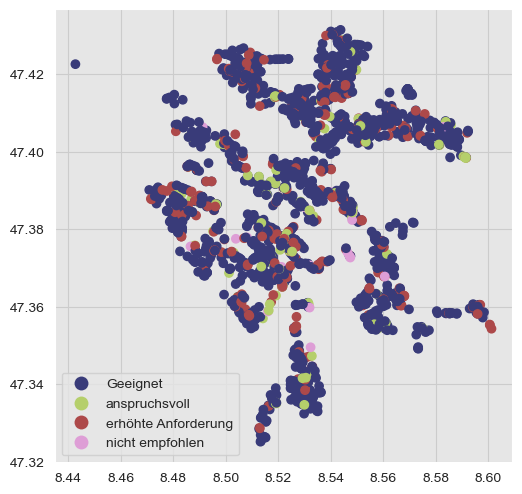

In [6]:
gdf_poi_schulweg_geojson.to_file("gdf_poi_schulweg_geojson", driver='GeoJSON')
gdf_poi_schulweg_geojson.plot("gefahrenkategorie", cmap="tab20b", legend=True)

### Auswahl der Schulwegübergänge

Als Spielerei kannst Du nun beispielweise jene auswählen, die  für die Mittelstufe im Stadtkreis 3 ( `'mittelstufe =="ja" & stadtkreis == "3"`) existieren.



In [23]:
#Wähle ein Subset nach bestimmten Kriterien aus.
gdf_poi_schulweg_geojson_sel = gdf_poi_schulweg_geojson.query('mittelstufe =="ja" & stadtkreis == "3"')
gdf_poi_schulweg_geojson_sel.head(2)


,bemerkung,beschreibung,da,fussgaengerstreifen,gefahrenkategorie,kindergarten,mittelstufe,oberstufe,objectid,poi_id,stadtkreis,standort,uebergang_empf,unterstufe,vranlage_normal,vranlagenr,zone30,geometry
216,Abbiegende Fahrzeuge beachten (rechts aus der ...,Konfliktgrün,Stadtpolizei,ja,anspruchsvoll,nein,ja,nein,4507,swg327,3,Manesse-/Zurlindenstrasse,ja,ja,Kreuzung,Kreuzung,50,POINT Z (8.52318 47.36730 0.00000)
217,None,Übergang mit Verkehrsinsel,Stadtpolizei,ja,Geeignet,ja,ja,nein,4508,swg328,3,Zurlinden-/Manessestrasse,ja,ja,Kreuzung,Kreuzung,30,POINT Z (8.52319 47.36749 0.00000)


Zeige eine einfache Karte des Subsets:

<AxesSubplot:>

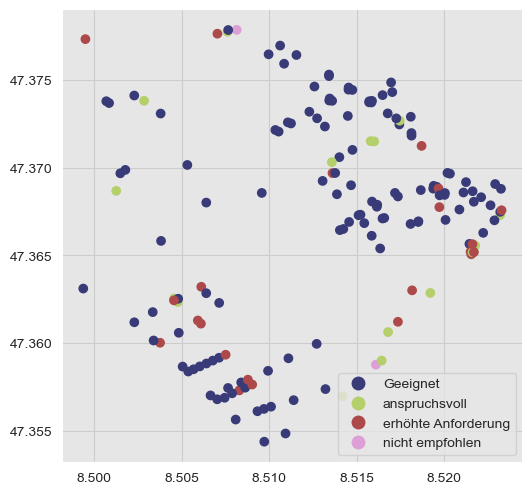

In [24]:
gdf_poi_schulweg_geojson_sel.plot("gefahrenkategorie", cmap="tab20b", legend=True, aspect = 'equal')

### Wandle ein DataFrame in Geopandas zu Pandas um

In [25]:
df_poi_schulweg = pd.DataFrame(gdf_poi_schulweg_geojson)
df_poi_schulweg.head(2)

,bemerkung,beschreibung,da,fussgaengerstreifen,gefahrenkategorie,kindergarten,mittelstufe,oberstufe,objectid,poi_id,stadtkreis,standort,uebergang_empf,unterstufe,vranlage_normal,vranlagenr,zone30,geometry
0,None,Übergang mit Tram,Stadtpolizei,ja,erhöhte Anforderung,ja,ja,ja,3917,swg557,6,Hofwiesenstrasse,ja,ja,keine,None,30,POINT Z (8.53660 47.39481 0.00000)
1,Abbiegende Fahrzeuge beachten,Ungesicherter Übergang,Stadtpolizei,nein,Geeignet,ja,ja,nein,3918,swg776,7,Freie-/Jupiterstrasse,ja,ja,keine,None,30,POINT Z (8.56168 47.36419 0.00000)


## Explorative_Analyse
One of the main objectives of this notebook is to do an exploratory data analysis to understand which questions this data set can answer. In addition, also determine its limitations. 

To begin, let us get the number of unique values per feature.


In [26]:
df_poi_schulweg.apply(lambda x: x.unique().size, axis=0)


bemerkung               202
beschreibung            114
da                        1
fussgaengerstreifen       3
gefahrenkategorie         5
kindergarten              3
mittelstufe               3
oberstufe                 3
objectid               1937
poi_id                 1937
stadtkreis               13
standort               1558
uebergang_empf            3
unterstufe                3
vranlage_normal           4
vranlagenr              101
zone30                    4
geometry               1864
dtype: int64

Da alle IDs unique sein müssen ist aus der Tabelle ersichtlich, dass es in der Stadt Zürich 
**1937 Schulwegübergänge** (Stand 23.07.2021) gibt.

### In welchen Stadtkreisen gibt es am meisten Schulwegübergänge?

In [27]:
 #   .query('kategorie == "Parkbaum"') \
#    .agg(anz_baeume=('objid', 'count'), anz_kinder_va_sk=('objid', 'sum')) \
df_poi_schulweg \
    .groupby(['stadtkreis' ]) \
    .agg(anz_schulweguebergaenge=('objectid', 'count')) \
    .sort_values('anz_schulweguebergaenge', ascending=False) \
    .head(500)


,anz_schulweguebergaenge
stadtkreis,
11,461
9,208
3,205
12,164
2,160
7,157
10,153
4,93
6,87


### Als wie gefährlich werden diese eingestuft?

In [28]:
df_poi_schulweg \
    .groupby(['gefahrenkategorie', ]) \
    .agg(anz_schulweguebergaenge=('objectid', 'count')) \
    .sort_values('anz_schulweguebergaenge', ascending=False) \
    .head(500)


,anz_schulweguebergaenge
gefahrenkategorie,
Geeignet,1432
erhöhte Anforderung,314
anspruchsvoll,136
nicht empfohlen,21


In [29]:
df_poi_schulweg \
    .groupby(['gefahrenkategorie', 'kindergarten', 'mittelstufe']) \
    .agg(anz_schulweguebergaenge=('objectid', 'count')) \
    .query('kindergarten == "ja"') \
    .sort_values('anz_schulweguebergaenge', ascending=False) \
    .head(500)


,,,anz_schulweguebergaenge
gefahrenkategorie,kindergarten,mittelstufe,
Geeignet,ja,ja,995
erhöhte Anforderung,ja,ja,84
Geeignet,ja,nein,13
anspruchsvoll,ja,ja,13
erhöhte Anforderung,ja,nein,3
nicht empfohlen,ja,ja,1


### Spiele mit PivotTableJS


In [30]:
import pivottablejs
from pivottablejs import pivot_ui

In [31]:
pivot_ui(gdf_poi_schulweg_geojson)

### Wo liegen die Schulwegübergänge, die als anspruchsvoll oder nicht empfohlen kategorisiert wurden?

In [32]:

#Wähle ein Subset nach bestimmten Kriterien aus.
gdf_poi_schulweg_geojson_sel2 = gdf_poi_schulweg_geojson.query('gefahrenkategorie =="anspruchsvoll" | gefahrenkategorie =="nicht empfohlen"')
gdf_poi_schulweg_geojson_sel2.head(2)
gdf_poi_schulweg_geojson_sel2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 157 entries, 17 to 1931
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   bemerkung            142 non-null    object  
 1   beschreibung         143 non-null    object  
 2   da                   157 non-null    object  
 3   fussgaengerstreifen  157 non-null    object  
 4   gefahrenkategorie    157 non-null    object  
 5   kindergarten         157 non-null    object  
 6   mittelstufe          122 non-null    object  
 7   oberstufe            122 non-null    object  
 8   objectid             157 non-null    float64 
 9   poi_id               157 non-null    object  
 10  stadtkreis           157 non-null    object  
 11  standort             152 non-null    object  
 12  uebergang_empf       122 non-null    object  
 13  unterstufe           122 non-null    object  
 14  vranlage_normal      157 non-null    object  
 15  vranlagenr   

<AxesSubplot:>

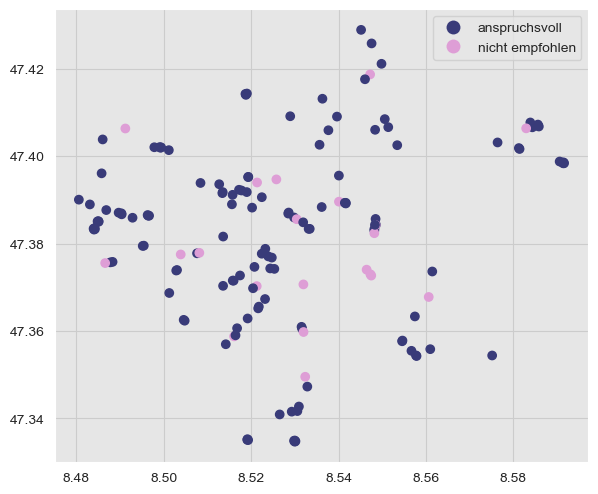

In [33]:
# plot options: https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.plot.html
# values vor cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html

gdf_poi_schulweg_geojson_sel2.to_file("gdf_poi_schulweg_geojson_sel2", driver='GeoJSON')
gdf_poi_schulweg_geojson_sel2.plot("gefahrenkategorie", cmap="tab20b", legend=True, aspect = 'equal')
# cmap="Accent"

### Zeichne eine Karte mit Hintergrundlayer und den anspruchsvollen Schulwegübergängen

Inspirationen dazu unter:
 - https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html
 - https://docs.bokeh.org/en/latest/docs/user_guide/geo.html
 - https://geopandas.readthedocs.io/en/latest/gallery/plotting_with_folium.html

Erstelle ein Karteobjekt mit dem Basislayer 'Basiskarte Stadt Zürich'

In [34]:
m = folium.Map(location=[47.36, 8.53], zoom_start=13, tiles=None)
folium.raster_layers.WmsTileLayer(
    url='https://www.ogd.stadt-zuerich.ch/wms/geoportal/Basiskarte_Zuerich_Raster',
    layers='Basiskarte Zürich Raster',
    name='Zürich - Basiskarte',
    fmt='image/png',
    overlay=False,
    control=False,
    autoZindex=False,
).add_to(m)

Füge die Marker der Standorte der Übergänge mit `gefahrenkategorie =="anspruchsvoll" | gefahrenkategorie =="nicht empfohlen"` ein.

In [35]:
points = folium.features.GeoJson(gdf_poi_schulweg_geojson_sel2)
m.add_child(points)
m

In [36]:
"""
import contextily as cx

ax = gdf_poi_schulweg_geojson_sel2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=gdf_poi_schulweg_geojson_sel2.crs)

"""

"\nimport contextily as cx\n\nax = gdf_poi_schulweg_geojson_sel2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')\ncx.add_basemap(ax, crs=gdf_poi_schulweg_geojson_sel2.crs)\n\n"